In [565]:
# Import the necessary libraries 
import numpy as np   # Provides single and multi-dimensional arrays
import pandas as pd  # Provides DataFrames for easy data manipulations and statstical functions
import matplotlib.pyplot as plt  # Provides several functions for plotting various graphs
% matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [566]:
# Read concrete compressive strength data into a dataframe
orig_ccs_df = pd.read_csv('concrete.csv')
orig_ccs_df.shape

# All the rows & features from data file are read into the dataframe

(1030, 9)

In [567]:
# Make a copy of the original data so we dont have to load data again if we need to rollback our changes later
ccs_df = orig_ccs_df.copy()
ccs_df.shape

# All the rows & features from original dataframe are copied into ccs_df

(1030, 9)

##### Exploratory Data Analysis

In [568]:
# Get more info on the datatypes of the columns 
ccs_df.info()

# There are 1030 rows and 9 columns
# All of them are numeric columns
# 'strength' is the target variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [569]:
# Five point summary of all the variables
ccs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [570]:
ccs_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [571]:
# Check for duplicate data

dups = ccs_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

ccs_df[dups]

# To check for duplicates by column
#pd.concat(g for _, g in vehicle_df.groupby("col_name") if len(g) > 1).count()

# Remove duplicate rows

#print('Number of rows before discarding duplicates = %d' % (vehicle_df.shape[0]))
#vehicle_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
#print('Number of rows after discarding duplicates = %d' % (vehicle_df.shape[0]))

Number of duplicate rows = 25


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [572]:
# Check for missing values
ccs_df.isnull().sum()

# There are no missing values in any of the columns
# There are no non-numeric characters in any of the columns either

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

##### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216CD234E48>,
      dtype=object)

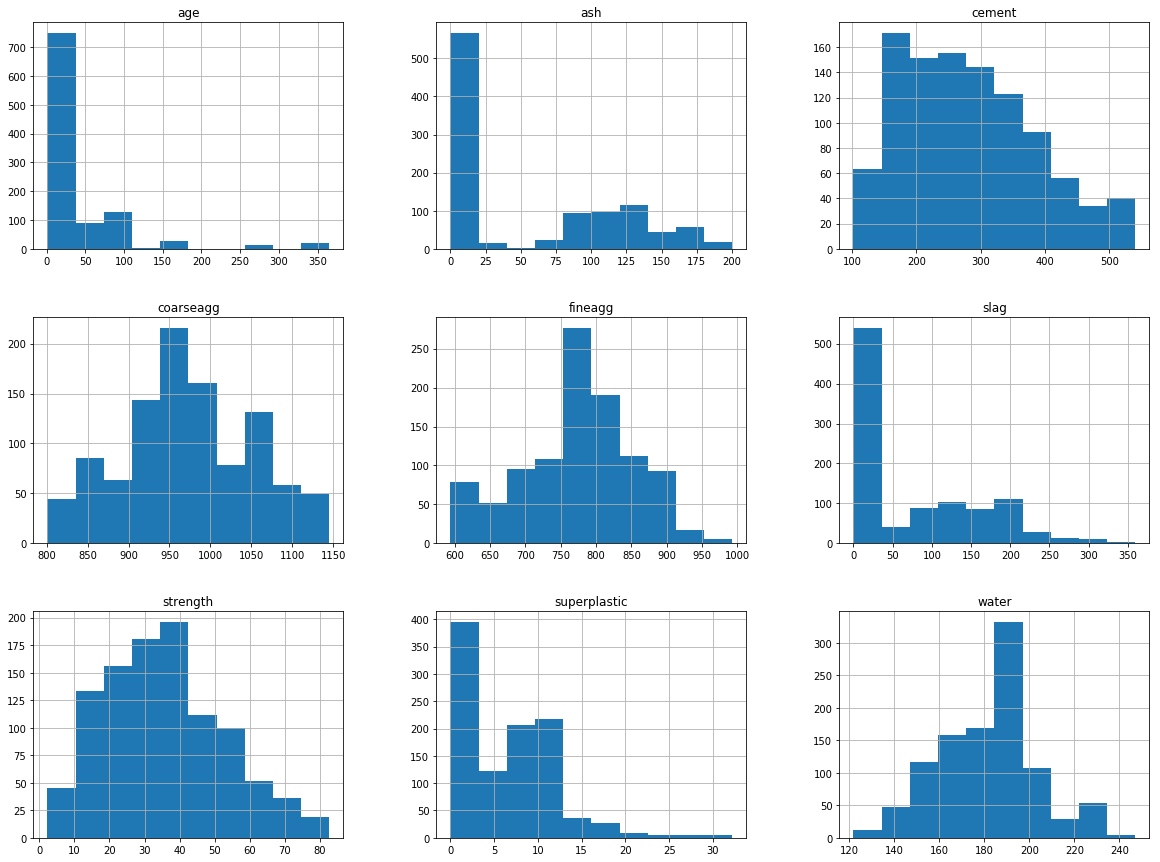

In [573]:
# Distributions for each of the numeric columns
ccs_df.hist(figsize=(20,15))

# Columns with almost normal distributions, cement, coarseagg, fineagg, water and strength
# Columns with right skew, slag and superplastic indicating outliers
# Columns age, ash, slag and superplastic have a min value of 0. Need to investigate if they are missing info or not

##### Target Variable Analysis

In [574]:
# Define function to identify outliers given the dataframe and col
def identify_outliers(df, col):
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3-Q1
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower Limit -', Q1 - 1.5*IQR)
    print('Upper Limit -', Q3 + 1.5*IQR)
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    
    return outliers

Std Dev: 16.70574196191251
Skew: 0.41697728841071807


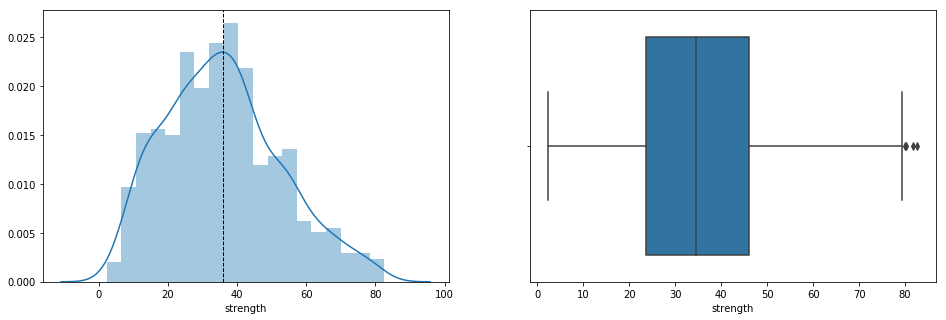

In [575]:
# strength - Numerical/Continuous
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(ccs_df['strength'])
plt.axvline(ccs_df['strength'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(122)
sns.boxplot(ccs_df['strength'])

print('Std Dev:', ccs_df['strength'].std())
print('Skew:', ccs_df['strength'].skew())

# Distribution for 'strength' column is almost normal, with mean=35.82 and median=34.44
# Values ranging from 2.33 - 82.6
# There are no missing values
# Outliers present

In [576]:
identify_outliers(ccs_df, 'strength')

# The values identified as outliers are natural and hence no imputation needed

Column: strength
IQR: 22.425000000000008
Lower Limit - -9.927500000000013
Upper Limit - 79.77250000000001


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


Std Dev: 104.50636449481536
Skew: 0.5094811788717731


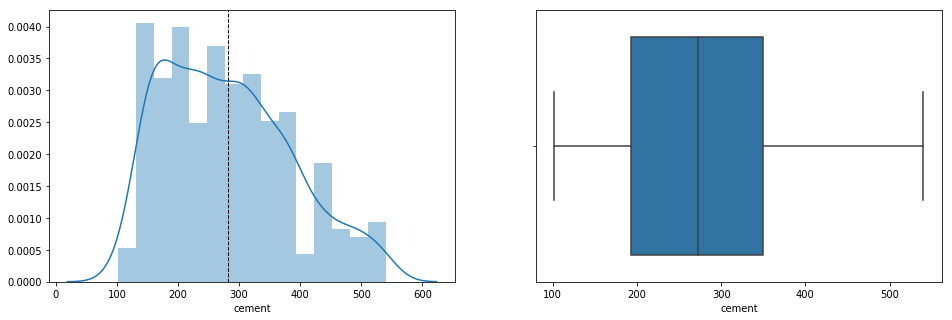

In [577]:
# cement - Numerical/Continuous
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(ccs_df['cement'])
plt.axvline(ccs_df['cement'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(122)
sns.boxplot(ccs_df['cement'])

print('Std Dev:', ccs_df['cement'].std())
print('Skew:', ccs_df['cement'].skew())

# Distribution for 'cement' column is almost normal, with mean=281.2 and median=272.9
# Values ranging from 102 - 540
# There are no missing values or outliers

Std Dev: 86.2793417481054
Skew: 0.8007168956061774


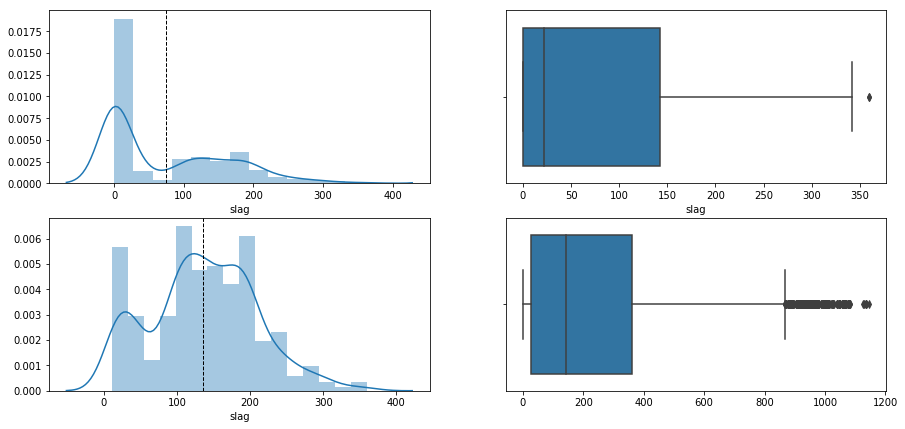

In [578]:
# slag - Numerical/Continuous
plt.figure(1, figsize=(15,7))
plt.subplot(221)
sns.distplot(ccs_df['slag'])
plt.axvline(ccs_df['slag'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(222)
sns.boxplot(ccs_df['slag'])
plt.subplot(223)
sns.distplot(ccs_df[ccs_df['slag'] != 0]['slag'])
plt.axvline(ccs_df[ccs_df['slag'] != 0]['slag'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(224)
sns.boxplot(ccs_df[ccs_df['slag'] != 0])

print('Std Dev:', ccs_df['slag'].std())
print('Skew:', ccs_df['slag'].skew())

# Distribution for 'slag' column is right skewed indicating presnce of outliers
# There is a peak at 0. These may be missing values.
# Outliers are present
# Ignoring 0s, this column has a very wide range: from 11 - 359.4, with mean=73.89 and median=22

In [579]:
ccs_df[ccs_df['slag']==0].head()

# 471 rows with 0 in this column
# It is possible that no slag is added to the concrete mix, hence no evidence to conclude that these are missing values.

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
12,385.0,0.0,0.0,186.0,0.0,966.0,763.0,14,27.92


In [580]:
identify_outliers(ccs_df, 'slag')

# The values identified as outliers are close to the other high data and hence there is no need to impute. 

Column: slag
IQR: 142.95
Lower Limit - -214.42499999999998
Upper Limit - 357.375


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


Std Dev: 63.99700415268794
Skew: 0.5373539058066844


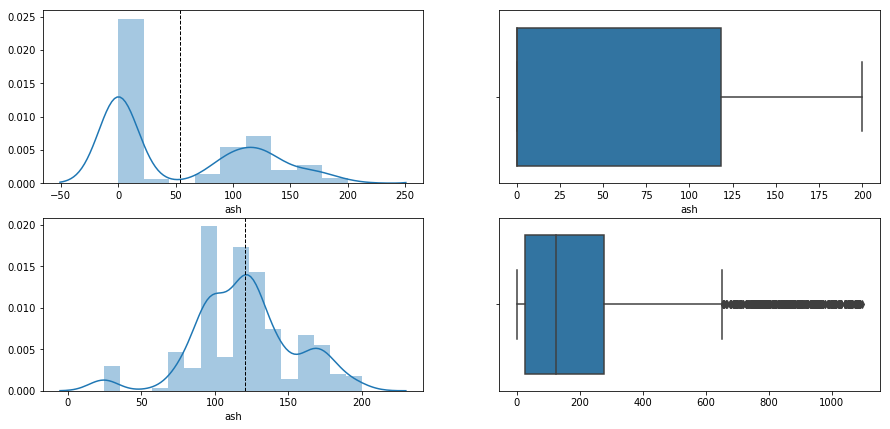

In [581]:
# ash - Numerical/Continuous
plt.figure(1, figsize=(15,7))
plt.subplot(221)
sns.distplot(ccs_df['ash'])
plt.axvline(ccs_df['ash'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(222)
sns.boxplot(ccs_df['ash'])
plt.subplot(223)
sns.distplot(ccs_df[ccs_df['ash'] != 0]['ash'])
plt.axvline(ccs_df[ccs_df['ash'] != 0]['ash'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(224)
sns.boxplot(ccs_df[ccs_df['ash'] != 0])

print('Std Dev:', ccs_df['ash'].std())
print('Skew:', ccs_df['ash'].skew())

# Distribution for 'ash' column is right skewed possibly indicating presence of outliers
# There is a peak at 0. These may be missing values.
# There are no outliers
# Ignoring 0s, this column has a very wide range: from 24.5 - 200.1, with mean=54.19

In [582]:
ccs_df[ccs_df['ash']==0]

# 566 rows with 0 in this column
# It is possible that no ash is added to the concrete mix, hence no evidence to conclude that these are missing values.

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
11,173.0,116.0,0.0,192.0,0.0,946.8,856.8,3,6.94
12,385.0,0.0,0.0,186.0,0.0,966.0,763.0,14,27.92
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08


Std Dev: 21.35421856503245
Skew: 0.07462838428549402


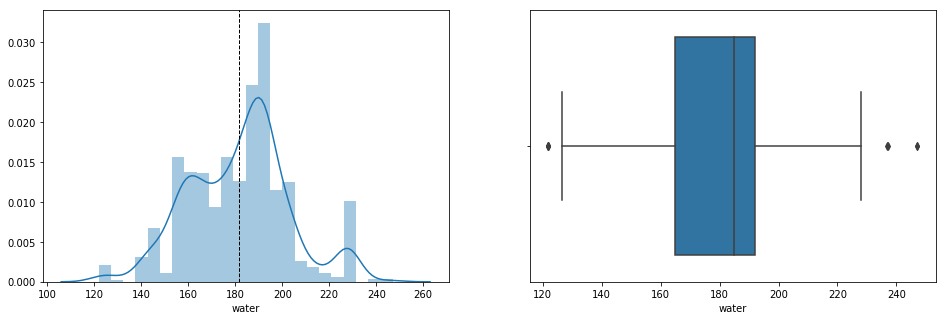

In [583]:
# water - Numerical/Continuous
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(ccs_df['water'])
plt.axvline(ccs_df['water'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(122)
sns.boxplot(ccs_df['water'])

print('Std Dev:', ccs_df['water'].std())
print('Skew:', ccs_df['water'].skew())

# Distribution for 'water' column is almost normal, with mean~181 and median~185
# Values ranging from 121 - 247 
# There are no missing values
# Outliers are present

In [584]:
identify_outliers(ccs_df, 'water')

# The values identified as outliers are close to the other extreme data and do not look like typo errors
# Hence there is no need to impute. 

Column: water
IQR: 27.099999999999994
Lower Limit - 124.25000000000001
Upper Limit - 232.64999999999998


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


Std Dev: 5.973841392485508
Skew: 0.9072025748672466


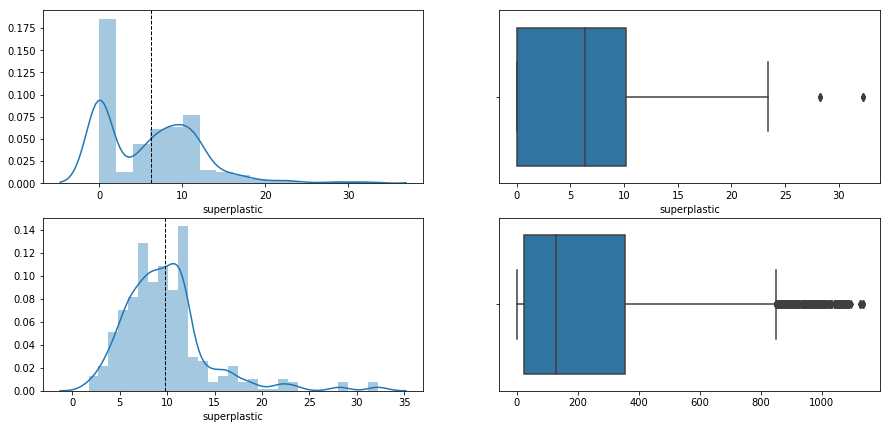

In [585]:
# superplastic - Numerical/Continuous
plt.figure(1, figsize=(15,7))
plt.subplot(221)
sns.distplot(ccs_df['superplastic'])
plt.axvline(ccs_df['superplastic'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(222)
sns.boxplot(ccs_df['superplastic'])
plt.subplot(223)
sns.distplot(ccs_df[ccs_df['superplastic'] != 0]['superplastic'])
plt.axvline(ccs_df[ccs_df['superplastic'] != 0]['superplastic'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(224)
sns.boxplot(ccs_df[ccs_df['superplastic'] != 0])

print('Std Dev:', ccs_df['superplastic'].std())
print('Skew:', ccs_df['superplastic'].skew())

# Distribution for 'superplastic' column is right skewed possibly indicating presence of outliers. Mean=6.2
# There is a peak at 0. These may be missing values.
# There are outliers on the upper end of the data
# Ignoring 0s, this column has a range of 1.7 - 32.2, with mean~9.5

In [586]:
# Missing values
ccs_df[ccs_df['superplastic']==0].head()

# 379 rows with superplastic col val = 0. Certain concrete mixes dont need superplastic added. Hence 0s are ok in the col.

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65


In [587]:
identify_outliers(ccs_df, 'superplastic')

# The values identified as outliers are close to the other extreme data and do not look like typo errors
# Hence there is no need to impute. 

Column: superplastic
IQR: 10.2
Lower Limit - -15.299999999999999
Upper Limit - 25.5


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


Std Dev: 77.75395396672087
Skew: -0.04021974481106704


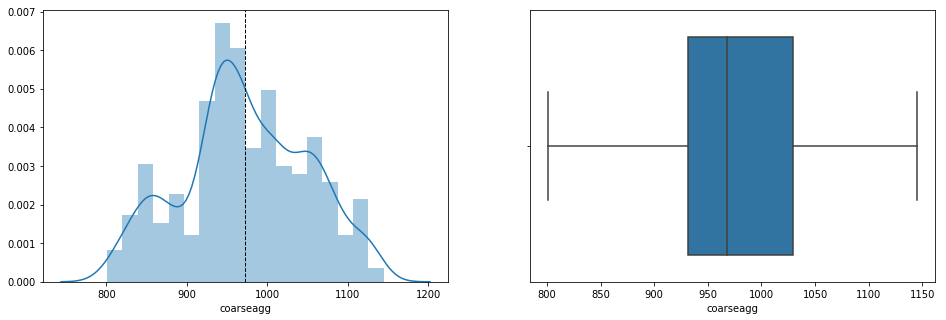

In [588]:
# coarseagg - Numerical/Continuous
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(ccs_df['coarseagg'])
plt.axvline(ccs_df['coarseagg'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(122)
sns.boxplot(ccs_df['coarseagg'])

print('Std Dev:', ccs_df['coarseagg'].std())
print('Skew:', ccs_df['coarseagg'].skew())

# Distribution for 'coarseagg' column is almost normal, with mean=972.91 and median=968
# Values ranging from 801 - 1145 
# There are no missing values or outliers

Std Dev: 80.17598014240443
Skew: -0.25300959769707143


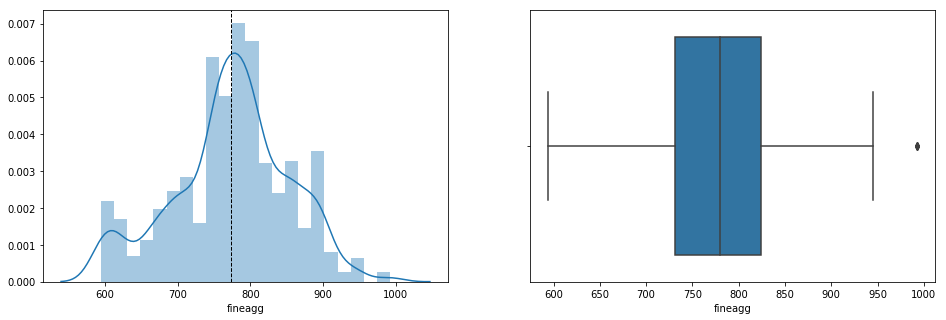

In [589]:
# fineagg - Numerical/Continuous
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(ccs_df['fineagg'])
plt.axvline(ccs_df['fineagg'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(122)
sns.boxplot(ccs_df['fineagg'])

print('Std Dev:', ccs_df['fineagg'].std())
print('Skew:', ccs_df['fineagg'].skew())

# Distribution for 'fineagg' column is almost normal, with mean=773 and median=779
# Values ranging from 594 - 992
# There are no missing values
# Outliers present

In [590]:
identify_outliers(ccs_df, 'fineagg')

# The values identified as outliers do not look like typo errors
# Hence there is no need to impute. 

Column: fineagg
IQR: 93.05000000000007
Lower Limit - 591.3749999999998
Upper Limit - 963.575


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


Std Dev: 63.16991158103279
Skew: 3.2691774006345895


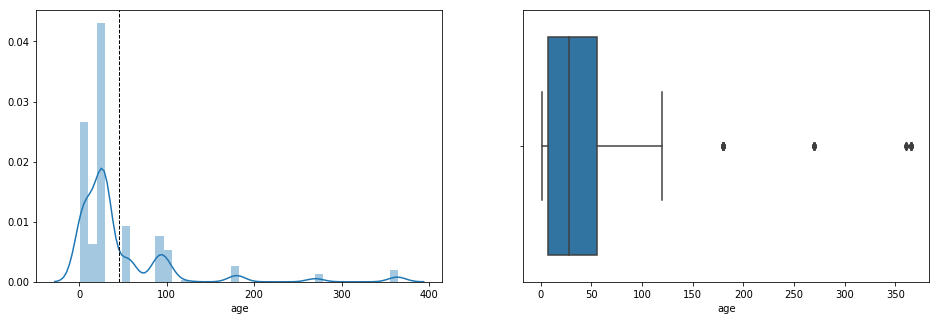

In [591]:
# age - Numerical/Continuous
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(ccs_df['age'])
plt.axvline(ccs_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(122)
sns.boxplot(ccs_df['age'])

print('Std Dev:', ccs_df['age'].std())
print('Skew:', ccs_df['age'].skew())

# Distribution for 'age' column is very skewed, with mean=45.66 and median=28
# Values ranging from 1 - 365, all valid days of the year
# There are no missing values, however most observations appear to be taken with in 45 days of mixing the concrete
# Outliers present

In [592]:
identify_outliers(ccs_df, 'age')

# Hence there is no need to impute as they are all valid days of the year 
# though most observations appear to be taken with in 45 days of mixing the concrete

Column: age
IQR: 49.0
Lower Limit - -66.5
Upper Limit - 129.5


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


##### Bivariate Analysis

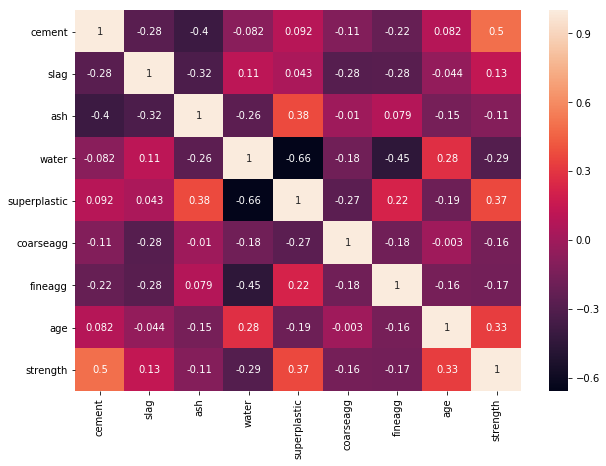

In [593]:
# Heatmap to see correlation between each pair of columns
plt.subplots(figsize = (10,7))
sns.heatmap(ccs_df.corr(), annot=True)

# High -ve corr - Superplastic/water, fineagg/water, ash/cement (Superplastic and fineagg seems to require less water)
# High +ve corr - Superplastic/ash, fineagg/superplastic, age/water
# High +ve or -ve corr with Target variable - Cement followed by Superplastic and Aging of concrete, and water(-ve) 

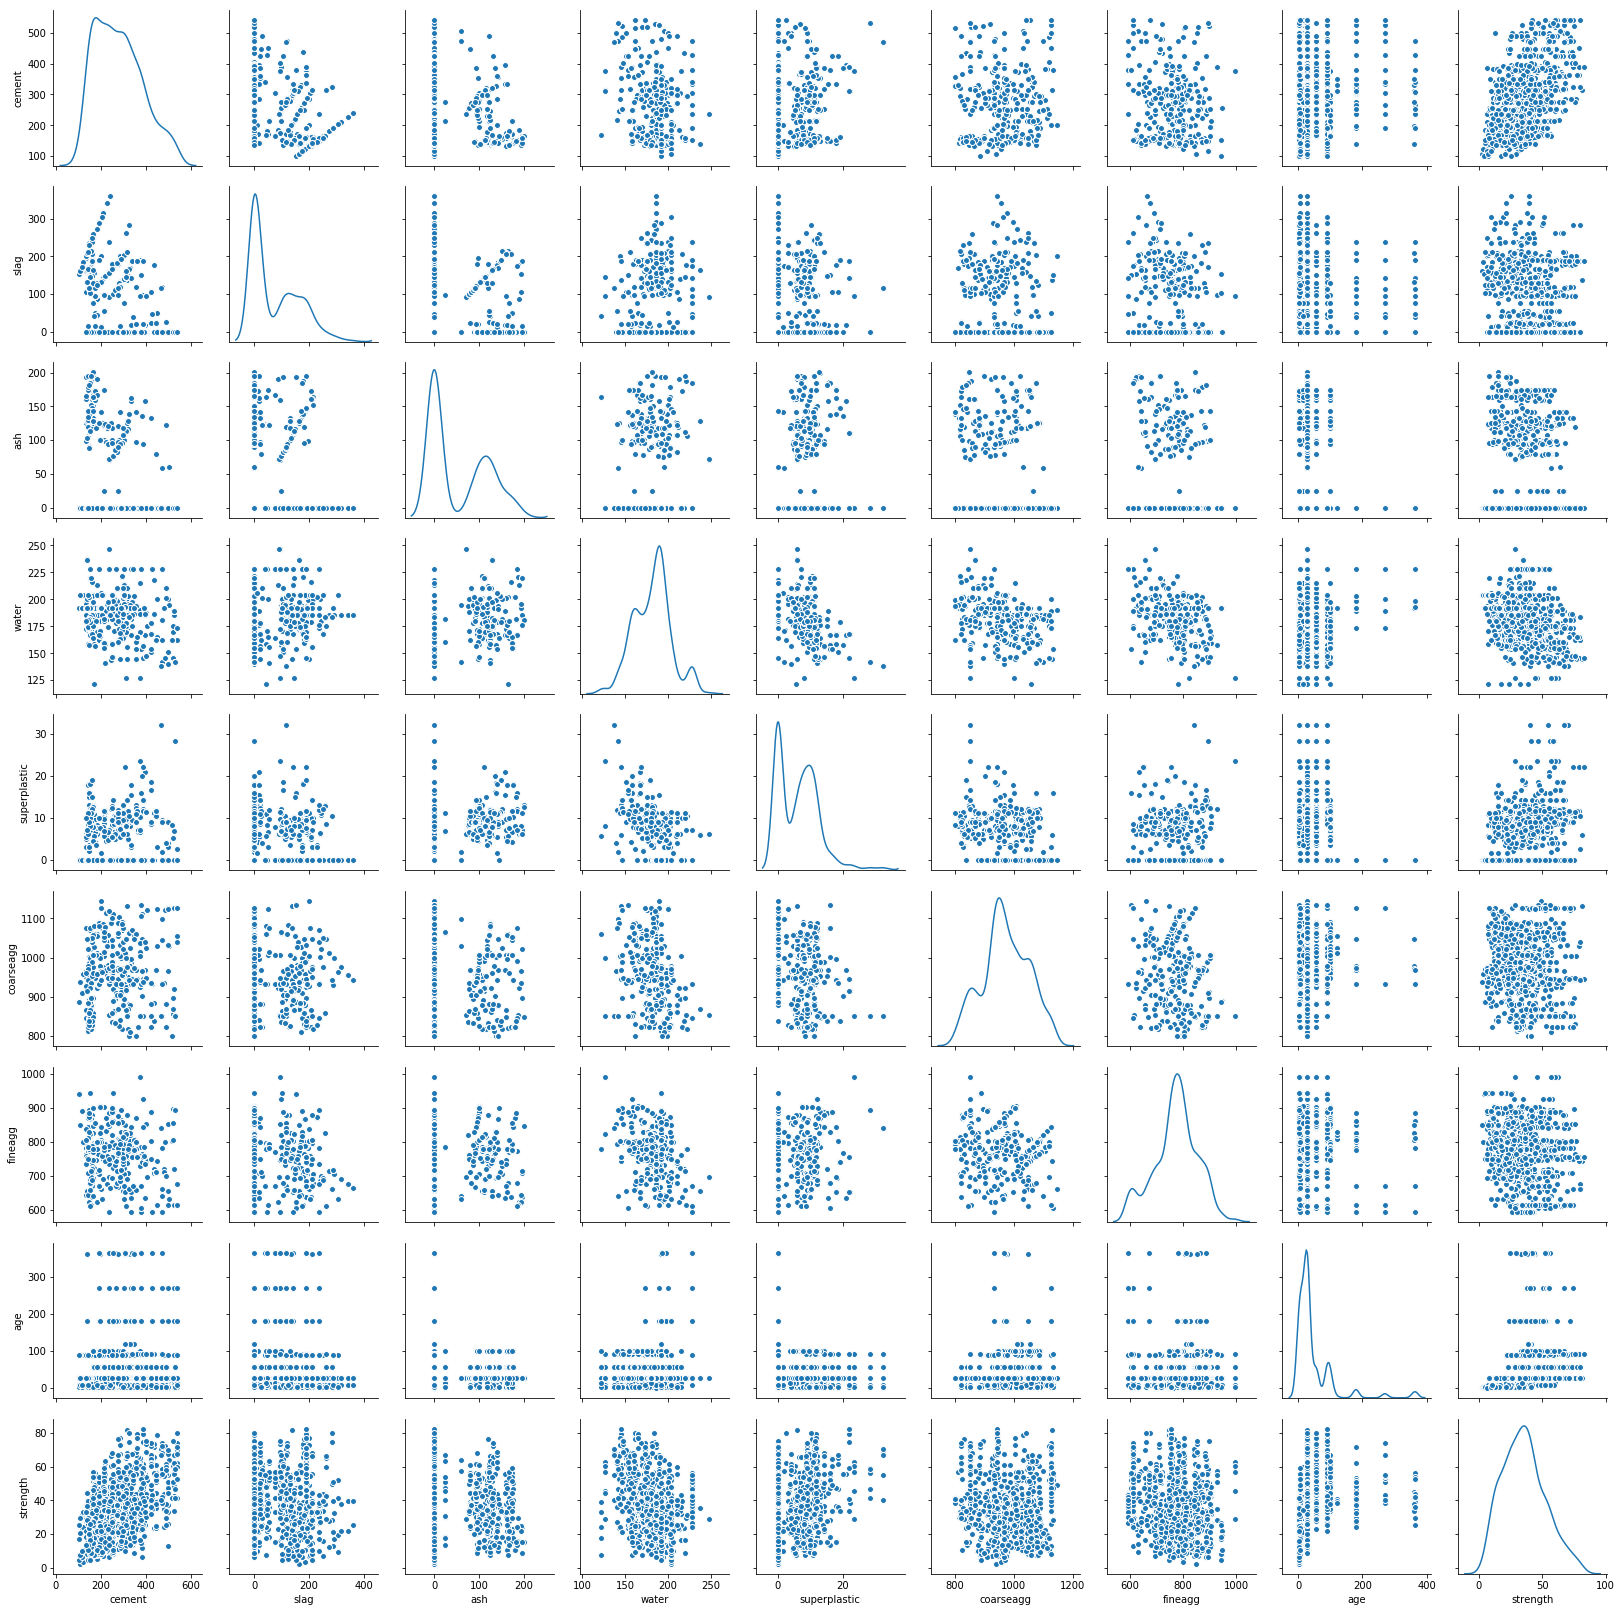

In [594]:
# Use pairplot() to plot pairwise relationships between all columns in the dataset
sns.pairplot(ccs_df, diag_kind='kde')

# cement has a high correlation with the target variable.
# Superplastic and Aging of concrete(73% of data is recorded for less than 45 days), and water(-ve) have high corr with the target variable too
# Strength has almost a normal distribution. Bus there are hints of 3 gaussians, need to invetigate further.
# The density plots indicate the presence of a minimum of three gaussians.

In [595]:
# Create bins for strength to see how points are distributed across different ranges of strengths
bins = [0, 20, 40, 60, 80, 100]
ccs_df['bin'] = pd.cut(ccs_df['strength'], bins)

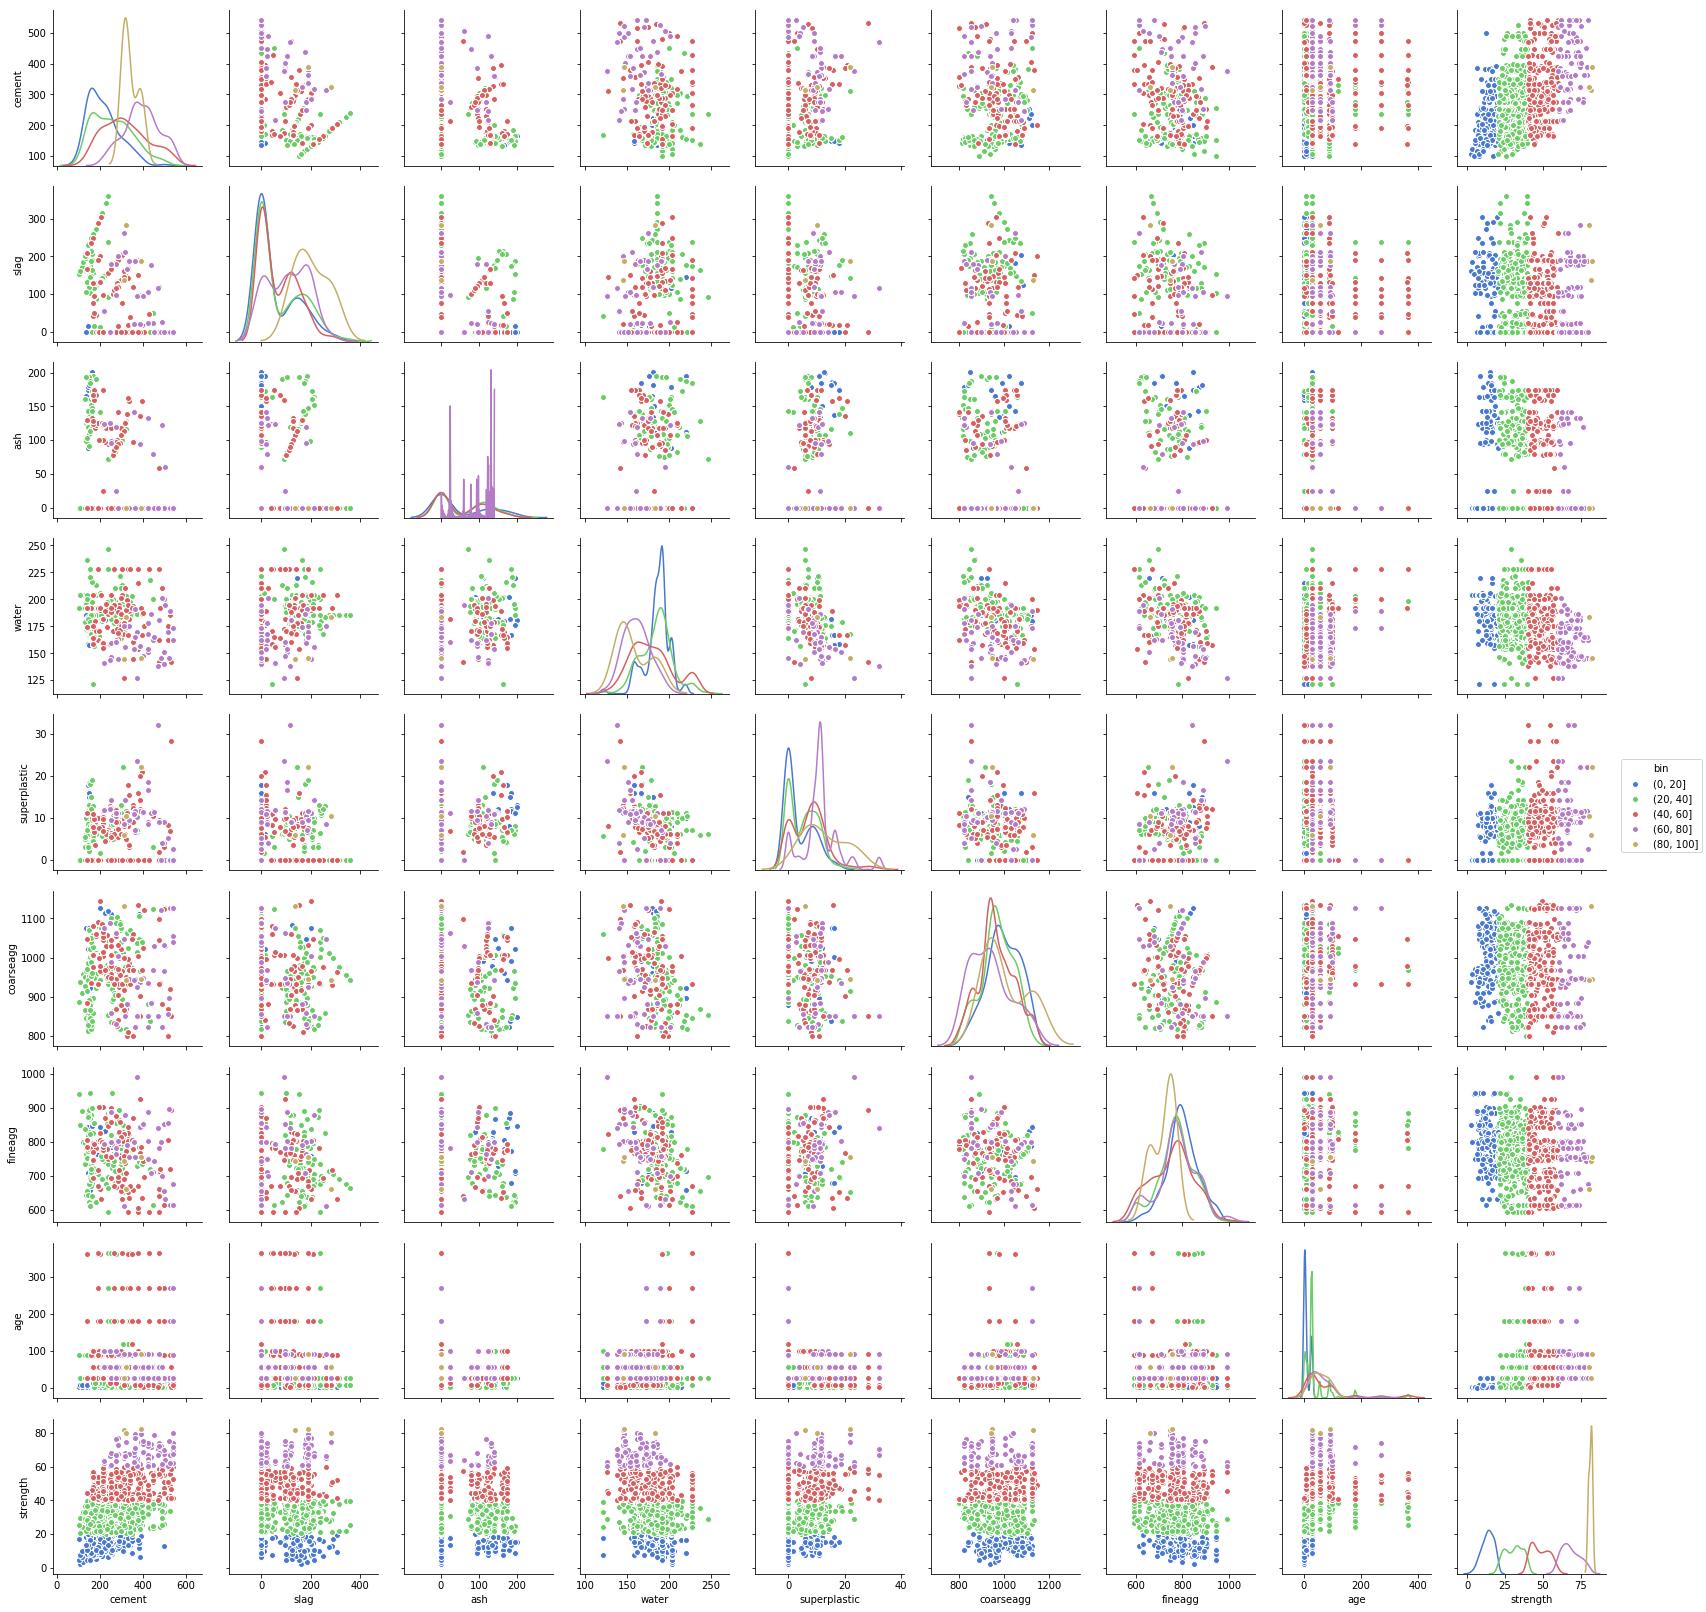

In [596]:
sns.pairplot(ccs_df, hue="bin", palette="muted", diag_kind='kde') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216D92F98D0>,
      dtype=object)

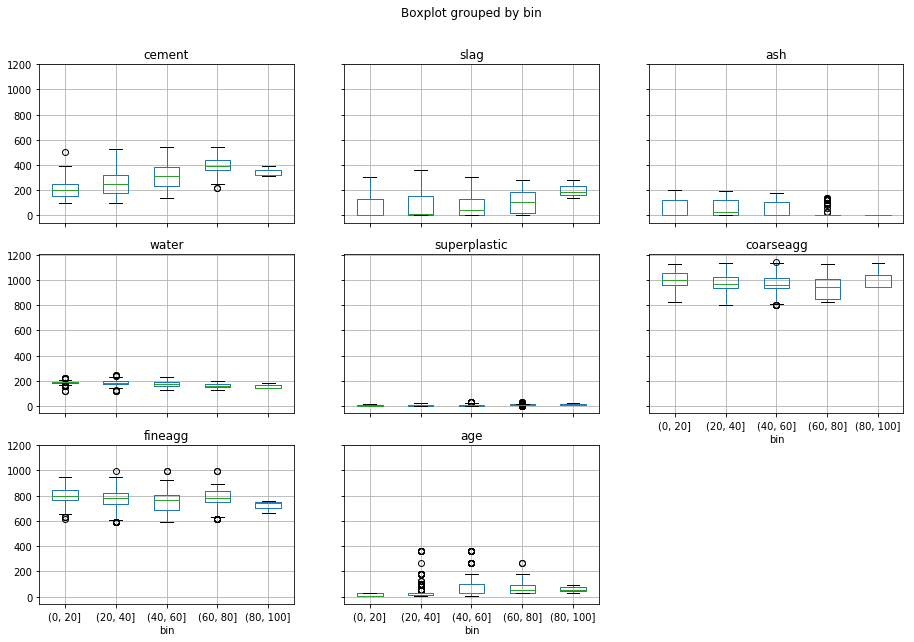

In [597]:
# Boxplots to understand how the medians of all columns vary as the strength varies 
ccs_df.boxplot(by='bin', column=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age'], figsize=(15, 10))

In [598]:
# Discard the bin column
ccs_df.drop(columns='bin', axis=1, inplace=True)

### Iteration - 1

##### Build Linear Regression Model Initially

In [599]:
# Create a df to store all results of all the model results
results = pd.DataFrame(columns=['Iteration','Model','Description','R2','Adjusted R2','RMSE'])
results

,Iteration,Model,Description,R2,Adjusted R2,RMSE


In [600]:
# Separate the independent attributes from the target variable
X = ccs_df.drop(columns=['strength'], axis=1)
y = pd.DataFrame(ccs_df['strength'])

print('X:', X.shape)
print('y:', y.shape)

X: (1030, 8)
y: (1030, 1)


In [601]:
# Create the training and test data set in the ratio of 60:40 respectively
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (618, 8)
X_test: (412, 8)
y_train: (618, 1)
y_test: (412, 1)


In [602]:
# Standardize the data after splitting, using the Standard Scaler
from sklearn.preprocessing import StandardScaler

# Fit the scaling on the training data
sc = StandardScaler()
sc.fit(X_train)

# Transform both the train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'])

X_test = pd.DataFrame(X_test, columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'])

# All the columns are in the same scale.

In [603]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create Linear regression object 
reg = LinearRegression() 
   
# Train the model using the training set
reg.fit(X_train, y_train) 
  
# Making predictions on the testing set 
y_pred = reg.predict(X_test)

r_squared_regr_train = reg.score(X_train, y_train)
r_squared_regr = reg.score(X_test, y_test)

# Get the model's linear coefs and intercept
print('Regression Coeffs:', reg.coef_)
print('Regression Intercept:', reg.intercept_)

Regression Coeffs: [[13.2194872   9.33463331  6.03124918 -2.23603239  2.19782018  1.89446695
   2.95845327  7.14958116]]
Regression Intercept: [35.63917476]


In [604]:
# Get the R2 and Adjusted R2
#print('R_squared training:', r_squared_regr_train)
print('R_squared:', r_squared_regr)
adj_r_squared = 1-((1-r_squared_regr)*(412-1)/(412-8-1))
print('Adjusted R_squared:', adj_r_squared)
print('\n')

# Calculate MAE, MSE and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df in the order 'Iteration','Model','Description','R2','Adjusted R2','RMSE'
results = results.append({'Iteration':'1','Model':'LinearRegression','Description':'LR with all columns',
                           'R2':r_squared_regr, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

# This linear regression model explains only ~ 62% of variablity

R_squared: 0.6271514838059622
Adjusted R_squared: 0.6197500244274206


Mean Absolute Error: 8.272990983879914
Mean Squared Error: 110.10681672715234
Root Mean Squared Error: 10.493179533732963


In [605]:
# Since there is non-linearity and complex relationship between many independent & response variables,
# let us check if Decision Tree Regressor model fits this data better
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)

# Making predictions on the testing set 
y_pred = dtr.predict(X_test)

r_squared_train = dtr.score(X_train, y_train)
r_squared_dtr = dtr.score(X_test, y_test)
adj_r_squared = 1-((1-r_squared_dtr)*(412-1)/(412-8-1))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Get the R2 and Adjusted R2
#print('R_squared train:', r_squared_train)
print('R_squared:', r_squared_dtr)
print('Adjusted R_squared:', adj_r_squared)
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df in the order 'Iteration','Model','Description','R2','Adjusted R2','RMSE'
results = results.append({'Iteration':'1','Model':'DecisionTreeRegressor','Description':'DT with all columns',
                           'R2':r_squared_dtr, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

R_squared: 0.7897720506433024
Adjusted R_squared: 0.7855987911027227
Root Mean Squared Error: 7.87927250797016


In [606]:
# Decision Tree Classifier explains greater variance than Linear Regression

### Iteration - 2

##### In concrete mixing, water to cement ratio is a key factor, so lets create a new feature & check how the model performs

In [607]:
ccs_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [608]:
# Create the water_to_cement_ratio feature
ccs_df['water_to_cement_ratio'] = ccs_df['water']/ccs_df['cement']

ccs_df[['water', 'cement', 'water_to_cement_ratio']].corr()

,water,cement,water_to_cement_ratio
water,1.000000,-0.081587,0.332968
cement,-0.081587,1.000000,-0.879130
water_to_cement_ratio,0.332968,-0.879130,1.000000


In [609]:
# Drop the CEMENT column used for creating the new feature as its corr with the new feature is high
# We will not delete the water column

ccs_df.drop(columns=['cement'], axis=1, inplace=True)

In [610]:
ccs_df.head()

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_to_cement_ratio
0,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440198
1,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937241
2,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749600
3,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857143
4,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248708


In [611]:
# Separate the independent attributes from the target variable
X = ccs_df.drop(columns=['strength'], axis=1)
y = pd.DataFrame(ccs_df['strength'])

print('X:', X.shape)
print('y:', y.shape)

X: (1030, 8)
y: (1030, 1)


In [612]:
# Create the training and test data set in the ratio of 60:40 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Standardize the data after splitting, using the Standard Scaler
from sklearn.preprocessing import StandardScaler

# Fit the scaling on the training data
sc = StandardScaler()
sc.fit(X_train)

# Transform both the train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=['slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water_to_cement_ratio'])

X_test = pd.DataFrame(X_test, columns=['slag', 'ash', 'water','superplastic', 'coarseagg', 'fineagg', 'age', 'water_to_cement_ratio'])

X_train: (618, 8)
X_test: (412, 8)
y_train: (618, 1)
y_test: (412, 1)


In [613]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create Linear regression object 
reg = LinearRegression() 
   
# Train the model using the training set
reg.fit(X_train, y_train) 
  
# Making predictions on the testing set 
y_pred = reg.predict(X_test)

r_squared_train = reg.score(X_train, y_train)
r_squared_regr = reg.score(X_test, y_test)

# Get the models linear coefs and intercept
print('Regression Coeffs:', reg.coef_)
print('Regression Intercept:', reg.intercept_)

Regression Coeffs: [[ 3.40061993 -0.02459417 -5.30297608  1.98262658 -3.15834356 -2.80683462
   6.69352548 -6.85788235]]
Regression Intercept: [35.63917476]


In [614]:
#print('R_squared training:', r_squared_train)
print('R_squared:', r_squared_regr)
adj_r_squared = 1-((1-r_squared_test)*(412-1)/(412-8-1))
print('Adjusted R_squared:', adj_r_squared)
print('\n')

# Calculate MAE, MSE and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df
results = results.append({'Iteration':'2','Model':'LinearRegression','Description':'LR with cement column dropped',
                           'R2':r_squared_regr, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

# This linear regression model explains only 60.74% of variablity, lower than without addition of the new feature

R_squared: 0.6074764965629621
Adjusted R_squared: 0.9109507471917939


Mean Absolute Error: 8.58075294447737
Mean Squared Error: 115.91708583211684
Root Mean Squared Error: 10.76647973258283


In [615]:
# let us check if Decision Tree Regressor gives better results
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)

# Making predictions on the testing set 
y_pred = dtr.predict(X_test)

r_squared_train = dtr.score(X_train, y_train)
r_squared_dtr = dtr.score(X_test, y_test)
adj_r_squared = 1-((1-r_squared_test)*(412-1)/(412-8-1))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#print('R_squared train:', r_squared_train)
print('R_squared:', r_squared_dtr)
print('Adjusted R_squared:', adj_r_squared)
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df
results = results.append({'Iteration':'2','Model':'DecisionTreeRegressor','Description':'DT with cement column dropped',
                           'R2':r_squared_dtr, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

R_squared: 0.8598714751210799
Adjusted R_squared: 0.9109507471917939
Root Mean Squared Error: 6.432861025827929


In [616]:
results

,Iteration,Model,Description,R2,Adjusted R2,RMSE
0,1,LinearRegression,LR with all columns,0.627151,0.619750,10.493180
1,1,DecisionTreeRegressor,DT with all columns,0.789772,0.785599,7.879273
2,2,LinearRegression,LR with cement column dropped,0.607476,0.910951,10.766480
3,2,DecisionTreeRegressor,DT with cement column dropped,0.859871,0.910951,6.432861


In [617]:
# Yes! Decision Tree Regressor with the engineered feature is explaining 85.98% of variability
# The RMSE for Decision Tree Regressor model is lower, hence better than the Linear models
# Adjusted R2 is almost same as R2 for all the models, as the number of features are very few

# Tried deleting both the cement and water columns, but this reduces the R2 value for both LR and DT models

##### Explore for gaussians/clusters

In [618]:
# We will use the training data (without target var) from the previous iteration to perform clustering
# It is already scaled
X_train.head()

,slag,ash,water,superplastic,coarseagg,fineagg,age,water_to_cement_ratio
0,1.335024,2.122606,0.200138,0.124093,-1.010193,-1.737616,-0.286465,1.133050
1,1.625947,-0.902541,1.095393,-1.081983,-0.055053,-0.304909,-0.676307,2.194948
2,-0.841074,-0.902541,0.490491,-1.081983,-0.104233,1.064123,0.680345,-0.203064
3,-0.585063,1.145251,-0.622528,0.451456,-1.993805,-0.285806,0.150159,-1.140027
4,-0.841074,0.630200,-1.672638,1.364628,0.152024,1.484384,-0.676307,-0.553391


In [619]:
# K-means clustering
from sklearn.cluster import KMeans

# We will use the elbow method to identify the optimal number of clusters
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5, random_state=1)
    clusters.fit(X_train)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,4944.000000
1,2,3977.646023
2,3,3376.616985
3,4,2886.642681
4,5,2478.934413
5,6,2203.474628
6,7,2053.768209
7,8,1922.588571
8,9,1799.045001
9,10,1699.051429


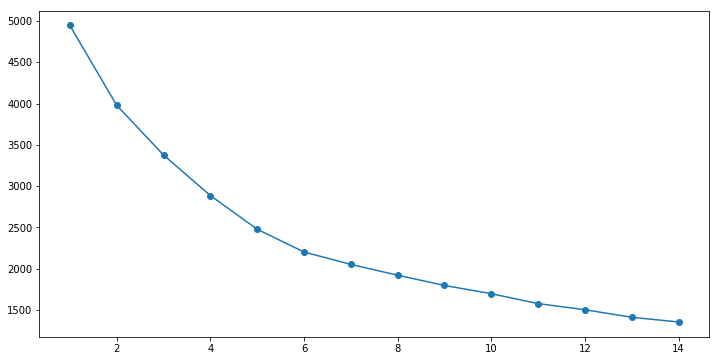

In [620]:
# Identify the optimal number of clusters
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [621]:
# let us create 9 custers, to strike a balance btwn computation and accuracy
# We can see an elbow at 6, but we can choose any where between 6 - 10. 

kmeans = KMeans(n_clusters=9, n_init = 5, random_state=1)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [622]:
# Check the number of points in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

# Cluster 4 has more data points than the others and cluster 6 has the least
# Ideally they should all have equal number of points

[ 63  96  35  89 118  67  27  43  80]


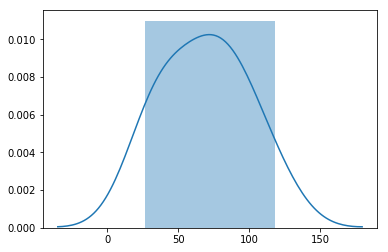

In [623]:
sns.distplot([ 63,  96,  35,  89, 118,  67,  27,  43,  80])
# The std is lowest and distribution of the datapoints when we use 9 clusters is better than the others

In [624]:
X_train.head()

,slag,ash,water,superplastic,coarseagg,fineagg,age,water_to_cement_ratio
0,1.335024,2.122606,0.200138,0.124093,-1.010193,-1.737616,-0.286465,1.133050
1,1.625947,-0.902541,1.095393,-1.081983,-0.055053,-0.304909,-0.676307,2.194948
2,-0.841074,-0.902541,0.490491,-1.081983,-0.104233,1.064123,0.680345,-0.203064
3,-0.585063,1.145251,-0.622528,0.451456,-1.993805,-0.285806,0.150159,-1.140027
4,-0.841074,0.630200,-1.672638,1.364628,0.152024,1.484384,-0.676307,-0.553391


In [625]:
# Add cluster number to original data
pred_train = kmeans.predict(X_train)
pred_test = kmeans.predict(X_test)

X_train['group'] = pred_train
X_train['group'] = X_train['group'].astype('category')

X_test['group'] = pred_test
X_test['group'] = X_test['group'].astype('category')

X_test.dtypes

slag                      float64
ash                       float64
water                     float64
superplastic              float64
coarseagg                 float64
fineagg                   float64
age                       float64
water_to_cement_ratio     float64
group                    category
dtype: object

In [626]:
# Check if the count of datapoints for each label matches the ones above 
X_train.groupby('group')['group'].count()

group
0     63
1     96
2     35
3     89
4    118
5     67
6     27
7     43
8     80
Name: group, dtype: int64

In [627]:
# Labels assigned to each datapoint in the test set
X_test.groupby('group')['group'].count()

group
0    49
1    62
2    23
3    64
4    96
5    44
6    18
7    31
8    25
Name: group, dtype: int64

In [628]:
# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = ['slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
       'water_to_cement_ratio'])
centroid_df.transpose()

,0,1,2,3,4,5,6,7,8
slag,1.618798,-0.734378,0.853856,0.574599,-0.776716,-0.380705,-0.280392,1.193162,-0.488549
ash,-0.902541,1.012383,1.127521,-0.709127,-0.878679,0.767067,-0.902541,-0.902541,1.234861
water,0.559239,-1.147583,0.573864,-1.069313,0.459405,0.515915,1.684164,0.536633,-0.091303
superplastic,-0.547591,0.588396,0.451456,1.286223,-1.000216,0.200469,-1.081983,-0.799898,0.199257
coarseagg,0.021265,0.599732,-0.963489,-0.612879,0.700096,-1.237687,-0.141431,-0.437121,0.653537
fineagg,-1.041042,0.814261,-0.533014,0.252019,-0.059303,0.085814,-1.361928,0.848780,-0.185437
age,-0.287702,-0.158467,-0.286465,-0.196056,-0.054145,-0.244804,3.825074,-0.150111,-0.165224
water_to_cement_ratio,0.222097,-0.083960,1.664260,-1.063618,-0.570864,-0.219870,-0.438365,1.909373,0.528836


In [629]:
# Group0 has highest values for slag and Group4 has the least
# Group8 has the highest ash content and Groups 0, 6 & 7 have the least
# Group6 has highest water content and Group 1 the least
# Group3 has the highest superplastic content and Group6 the least
# Group4 has the highest coarseagg and Group5 the least
# Group7 has the highest fineagg content and Group6 the least
# Group6 is the oldest/cured longest and Group0 the newest
# Group 7 has the highest water_to_cement_ratio and Group3 the least

### Iteration - 3

##### Ensemble Techniques

In [630]:
# Lets try the AdaBoost Regression Ensemble model
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state=1)
abr = abr.fit(X_train, y_train)

y_pred = abr.predict(X_test)

r_squared_train = abr.score(X_train, y_train)
r_squared_test = abr.score(X_test, y_test)
adj_r_squared = 1-((1-r_squared_test)*(412-1)/(412-9-1))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#print('R_squared train:', r_squared_train)
print('R_squared:', r_squared_test)
print('Adjusted R_squared:', adj_r_squared)
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df
results = results.append({'Iteration':'3','Model':'AdaBoostRegressor','Description':'ABR Ensemble with cluster labels',
                           'R2':r_squared_test, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

# Ada Boosting regression model is able to explain upto ~80% of variances

R_squared: 0.7975418924977355
Adjusted R_squared: 0.7930092482999236
Root Mean Squared Error: 7.7322961696661245


In [631]:
# Lets use the XGBoost Regression ensemble model
import xgboost as xgb

# Since xgb cant take categorical vars, we will convert the lables to int
X_train['group'] = X_train['group'].astype('int64')
X_test['group'] = X_test['group'].astype('int64')

xgbr = xgb.XGBRegressor(learning_rate=0.05)
xgbr = xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

r_squared_train = xgbr.score(X_train, y_train)
r_squared_test = xgbr.score(X_test, y_test)
adj_r_squared = 1-((1-r_squared_test)*(412-1)/(412-9-1))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#print('R_squared train:', r_squared_train)
print('R_squared:', r_squared_test)
print('Adjusted R_squared:', adj_r_squared)
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df
results = results.append({'Iteration':'3','Model':'XGBRegressor','Description':'XGB Ensemble with cluster labels',
                           'R2':r_squared_test, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

# As expected the Gradient Boosting regression model is able to answer to ~88% of variances

[19:03:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R_squared: 0.8813402019984189
Adjusted R_squared: 0.8786836393565924
Root Mean Squared Error: 5.919604563517505


In [632]:
# Lets use the Gradient Boost Regression ensemble model
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=3, loss='ls', learning_rate=0.05, n_estimators=100, max_features='auto', min_samples_split=2, random_state=1)
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r_squared_train = gbr.score(X_train, y_train)
r_squared_test = gbr.score(X_test, y_test)
adj_r_squared = 1-((1-r_squared_test)*(412-1)/(412-9-1))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#print('R_squared train:', r_squared_train)
print('R_squared:', r_squared_test)
print('Adjusted R_squared:', adj_r_squared)
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df
results = results.append({'Iteration':'3','Model':'GradientBoostingRegressor','Description':'GBR Ensemble with cluster labels',
                           'R2':r_squared_test, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

R_squared: 0.8830249121502751
Adjusted R_squared: 0.8804060668999082
Root Mean Squared Error: 5.877431604884618


In [633]:
results

,Iteration,Model,Description,R2,Adjusted R2,RMSE
0,1,LinearRegression,LR with all columns,0.627151,0.619750,10.493180
1,1,DecisionTreeRegressor,DT with all columns,0.789772,0.785599,7.879273
2,2,LinearRegression,LR with cement column dropped,0.607476,0.910951,10.766480
3,2,DecisionTreeRegressor,DT with cement column dropped,0.859871,0.910951,6.432861
4,3,AdaBoostRegressor,ABR Ensemble with cluster labels,0.797542,0.793009,7.732296
5,3,XGBRegressor,XGB Ensemble with cluster labels,0.881340,0.878684,5.919605
6,3,GradientBoostingRegressor,GBR Ensemble with cluster labels,0.883025,0.880406,5.877432


In [634]:
# As expected the Gradient Boosting regression model is able to explain the variances better than most algorithms 
# that were tried here, upto ~88%

In [635]:
# Lets look at the feature_importances_ attribute for this algorith. The features that are most important to this algo...
# ...may be different from the others as each algo uses the features differently 
feature_impts = pd.DataFrame([gbr.feature_importances_], columns=['slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
       'water_to_cement_ratio','group'])
feature_impts

,slag,ash,water,superplastic,coarseagg,fineagg,age,water_to_cement_ratio,group
0,0.162546,0.038761,0.07306,0.08823,0.041891,0.093249,0.257023,0.243523,0.001717


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

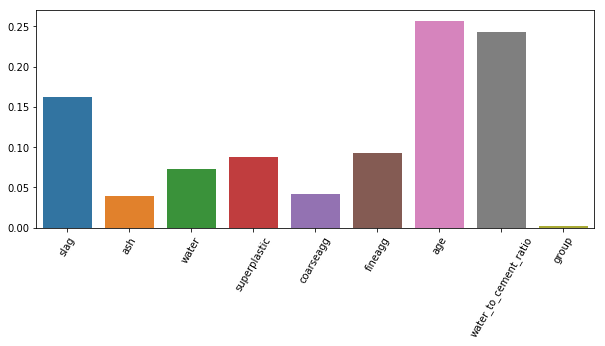

In [636]:
plt.figure(1, figsize=(10,4))
ax = sns.barplot(data=feature_impts)
plt.xticks(rotation=60)

# Age followed by water_to_cement_ratio and then slag are the most impt features based on GradientBoosting Algo
# Group followed by ash and coarseagg columns have contibuted least to the final recommendation using this model

### Iteration 4

##### Bootstrapping

In [637]:
# For boot strapping, we will use the entire data, including the target data
X = ccs_df.drop(columns=['strength'], axis=1)
y = pd.DataFrame(ccs_df['strength'])

# Move the target data to the last position
data = pd.concat([X, y], axis=1)
data.head()

,slag,ash,water,superplastic,coarseagg,fineagg,age,water_to_cement_ratio,strength
0,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,29.89
1,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,23.51
2,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,29.22
3,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,45.85
4,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,18.29


In [638]:
# Since the resample function takes only arrays as arguments, convert data to array
values = data.values

In [639]:
# We will use boot strapping with Decision Tree Regressor Algorithm as we need to use a slightly weak learner
from sklearn.utils import resample

In [640]:
# Configure Bootstrap
n_iterations = 100 # Number of bootstrap samples to be created

# Run Bootstrap
stats = list()
for i in range(n_iterations):
    # Prepare train and test sets
    train = resample(values) # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) # Data that was not used in train
    
    # Fit the model
    dtr_bs = DecisionTreeRegressor(random_state=1)
    dtr_bs = dtr_bs.fit(train[:,:-1], train[:,-1])
    
    # Evaluate Model
    y_pred = dtr_bs.predict(test[:, :-1])
    r_squared_test = dtr_bs.score(test[:, :-1], test[:,-1])
    
    # Record the scores of individual iterations
    stats.append(r_squared_test)

(array([ 4.,  1.,  2.,  8., 11., 20., 13., 25., 10.,  6.]),
 array([0.71937099, 0.7349792 , 0.75058741, 0.76619562, 0.78180383,
        0.79741203, 0.81302024, 0.82862845, 0.84423666, 0.85984487,
        0.87545308]),
 <a list of 10 Patch objects>)

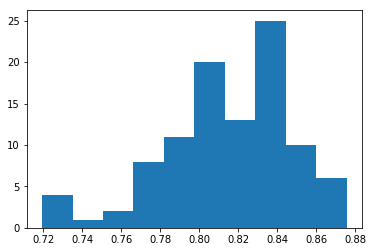

In [641]:
# Tried plotting distributions of scores for 10, 20, 30, 50 & 100 iterations
# The distribution takes on a more normal form as the iterations increase
plt.hist(stats) # 100

In [642]:
# Calculate Confidence Intervals
alpha = 0.95                  # For 95% confidence

p = ((1.0-alpha)/2.0)*100     # 2.5% left on both the tail regions
lower = max(0.0, np.percentile(stats, p))

p = (alpha + ((1-alpha)/2)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 72.8% and 87.1%


In [643]:
# So we can say that the Bootstrap Decision Tree Regressor with 100 iterations,
# will predict correctly from 76.0% to 85.8% variance, 95% of the times.

In [644]:
# Add the model metrics to the results df
r_squared_test = np.mean(stats)
adj_r_squared = 1-((1-r_squared_test)*(1030-1)/(1030-9-1))
results = results.append({'Iteration':'4','Model':'DT Regressor BootStrapping','Description':'DTR Bootstrapping, 100 iterations',
                           'R2':r_squared_test, 'Adjusted R2':adj_r_squared, 'RMSE':np.NaN}, ignore_index=True)

### Iteration 5

##### Model Tuning and Grid Search for Hyperparameters

In [645]:
# Lets use the RandomForestRegressor ensemble model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=1)
rfr = rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

r_squared_train = rfr.score(X_train, y_train)
r_squared_test = rfr.score(X_test, y_test)
adj_r_squared = 1-((1-r_squared_test)*(412-1)/(412-9-1))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#print('R_squared train:', r_squared_train)
print('R_squared:', r_squared_test)
print('Adjusted R_squared:', adj_r_squared)
print('Root Mean Squared Error:', rmse)

# Add the model metrics to the results df
results = results.append({'Iteration':'5','Model':'RandomForestRegressor','Description':'RFR Ensemble with default hyperparameters',
                           'R2':r_squared_test, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

R_squared: 0.900234753311006
Adjusted R_squared: 0.8980012030119987
Root Mean Squared Error: 5.427883707922644


In [646]:
# Look at all the hyperparameters for RandomForestRegressor
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [647]:
# Out of the above parameters, we will work with the below:
    # n_estimators = number of trees in the forest
    # max_features = max number of features considered for splitting a node
    # max_depth = max number of levels in each decision tree
    # min_samples_leaf = min number of data points allowed in a leaf node
    # bootstrap = method for sampling data points (with or without replacement) - I am going to keep this as True

In [648]:
# Lets define the grid for parameters
rfr_param_grid = {'n_estimators':[10,20,30], 
                  'max_features':[3,5,9],
                  'max_depth':[7,9,11],
                  'min_samples_leaf':[1,5,8]}
rfr_param_grid

{'n_estimators': [10, 20, 30],
 'max_features': [3, 5, 9],
 'max_depth': [7, 9, 11],
 'min_samples_leaf': [1, 5, 8]}

In [649]:
# Lets use the Random Grid Search CV to find the best hyper parameters 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rfr, rfr_param_grid, cv=10)    # CV set to 10 times

In [650]:
# Fit the GridSearch algo
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'max_features': [3, 5, 9], 'max_depth': [7, 9, 11], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [651]:
# Get the parameters with the best scores
gs.best_params_
#{'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 20} ---- 0.8873316593339149

{'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 30}

In [652]:
gs.cv_results_['params']

[{'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 1,
  'n_estimators': 10},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 1,
  'n_estimators': 20},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 1,
  'n_estimators': 30},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 5,
  'n_estimators': 10},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 5,
  'n_estimators': 20},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 5,
  'n_estimators': 30},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 8,
  'n_estimators': 10},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 8,
  'n_estimators': 20},
 {'max_depth': 7,
  'max_features': 3,
  'min_samples_leaf': 8,
  'n_estimators': 30},
 {'max_depth': 7,
  'max_features': 5,
  'min_samples_leaf': 1,
  'n_estimators': 10},
 {'max_depth': 7,
  'max_features': 5,
  'min_samples_leaf': 1,
  'n_estimators': 20},
 {'max_depth': 7,
  'max_features': 5,
  'm

In [653]:
gs.cv_results_['mean_test_score']

array([0.80514291, 0.8317166 , 0.84078571, 0.78505269, 0.80998269,
       0.819682  , 0.77717717, 0.79787798, 0.80139186, 0.85172595,
       0.86374348, 0.86548548, 0.83107803, 0.84197831, 0.84605641,
       0.81534848, 0.82400971, 0.82824869, 0.85797215, 0.86204838,
       0.86665023, 0.85265391, 0.85328225, 0.85382113, 0.83745466,
       0.83725782, 0.8372659 , 0.8390323 , 0.85664638, 0.86808375,
       0.79572275, 0.8193696 , 0.82819409, 0.77619633, 0.8001041 ,
       0.80573821, 0.85905146, 0.87296639, 0.87787908, 0.83647324,
       0.84901717, 0.85353688, 0.81855214, 0.82878294, 0.83112591,
       0.87330196, 0.87691348, 0.88024768, 0.85728915, 0.85880852,
       0.85878232, 0.83884244, 0.83972079, 0.83925402, 0.85251955,
       0.86700676, 0.87346761, 0.80644487, 0.82571655, 0.8324348 ,
       0.7819019 , 0.80277075, 0.80745434, 0.87220851, 0.87914652,
       0.88320651, 0.83762035, 0.84952856, 0.85479856, 0.82137697,
       0.83058849, 0.83251582, 0.87598028, 0.87900604, 0.88312

In [654]:
# Run the RandomForestRegressor Grid Search model with the best parameters from the tuning
y_pred = gs.predict(X_test)

r_squared_test = gs.score(X_test, y_test)
adj_r_squared = 1-((1-r_squared_test)*(412-1)/(412-9-1))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R_squared:', r_squared_test)

# Add the model metrics to the results df
results = results.append({'Iteration':'5','Model':'GS-RandomForestRegressor','Description':'Grid Search RFR Ensemble with tuned hyperparameters',
                           'R2':r_squared_test, 'Adjusted R2':adj_r_squared, 'RMSE':rmse}, ignore_index=True)

R_squared: 0.9065371156406576


In [655]:
results

,Iteration,Model,Description,R2,Adjusted R2,RMSE
0,1,LinearRegression,LR with all columns,0.627151,0.619750,10.493180
1,1,DecisionTreeRegressor,DT with all columns,0.789772,0.785599,7.879273
2,2,LinearRegression,LR with cement column dropped,0.607476,0.910951,10.766480
3,2,DecisionTreeRegressor,DT with cement column dropped,0.859871,0.910951,6.432861
4,3,AdaBoostRegressor,ABR Ensemble with cluster labels,0.797542,0.793009,7.732296
5,3,XGBRegressor,XGB Ensemble with cluster labels,0.881340,0.878684,5.919605
6,3,GradientBoostingRegressor,GBR Ensemble with cluster labels,0.883025,0.880406,5.877432
7,4,DT Regressor BootStrapping,"DTR Bootstrapping, 100 iterations",0.814966,0.813334,NaN
8,5,RandomForestRegressor,RFR Ensemble with default hyperparameters,0.900235,0.898001,5.427884
9,5,GS-RandomForestRegressor,Grid Search RFR Ensemble with tuned hyperparam...,0.906537,0.904445,5.253642


In [656]:
# Across the iterations, we have tried different regression models, feature engineering, clustering method, 
# bootstrapping, ensemble & GridSearch CV methods.

# Grid Search RandomForestRegressor Ensemble model with hyperparameter tuning is the best algorithm to predict the strength of concrete with the given parameters. 
# With ~90% of variance explained and minimal RMSE.

# RandomForestRegressor Ensemble model is second best with R2~89% and RMSE 5.4

# GradientBoostingRegressor with cluster labels added is performing very well too at 88.29% and minimal RMSE 5.878921. 
# But Feature Importance of cluster labels is negilgible.